In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


In [4]:
df=pd.read_csv("../input/Iris.csv")

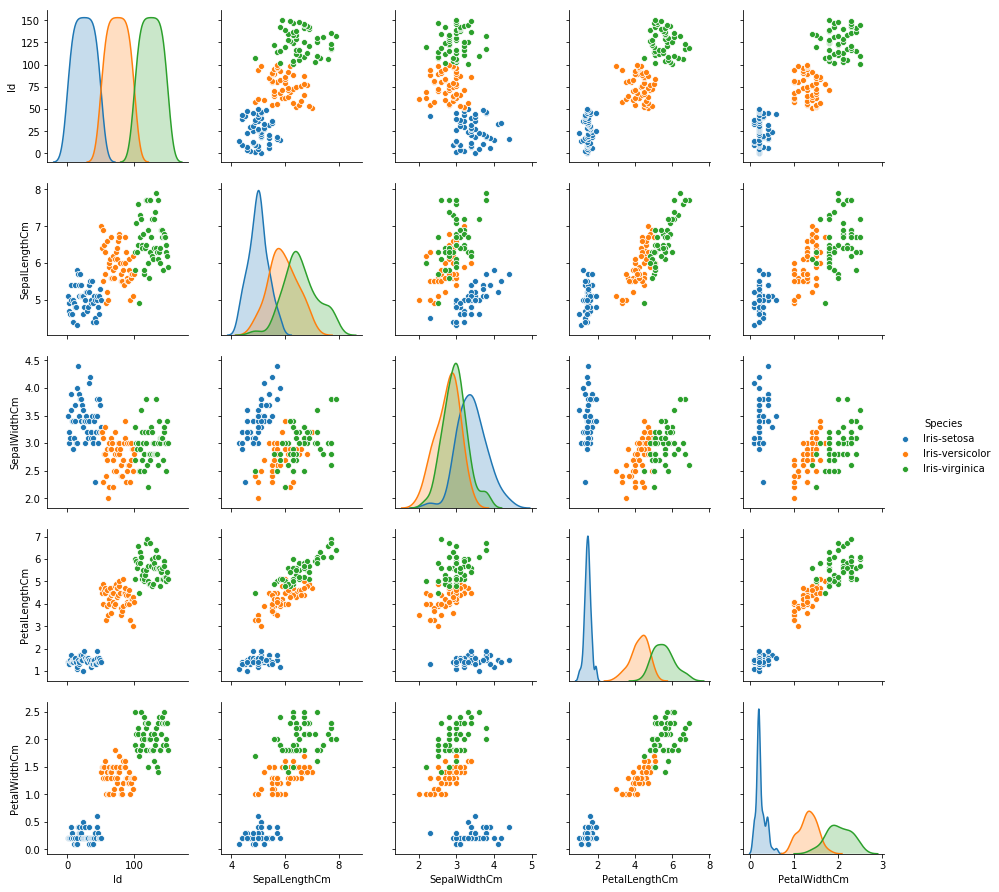

In [6]:
import seaborn as sns
sns.pairplot(df,hue="Species")

In [7]:
df.head()

Id  SepalLengthCm     ...       PetalWidthCm      Species
0   1            5.1     ...                0.2  Iris-setosa
1   2            4.9     ...                0.2  Iris-setosa
2   3            4.7     ...                0.2  Iris-setosa
3   4            4.6     ...                0.2  Iris-setosa
4   5            5.0     ...                0.2  Iris-setosa

[5 rows x 6 columns]

In [8]:
X=df.drop("Species",axis=1)
X.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2

In [9]:
X_1=X.drop("Id",axis=1)
X_1.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [10]:
target=df["Species"].unique()
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
target_dict={n:i for i,n in enumerate(target)}

In [12]:
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [13]:
y=df["Species"].map(target_dict)

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [15]:
from keras.utils.np_utils import to_categorical 

Using TensorFlow backend.


In [16]:
y_cat=to_categorical(y)

In [17]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y_cat,test_size=0.2)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(3,input_shape=(5,),activation="softmax"))
model.compile(Adam(lr=0.005),"categorical_crossentropy",metrics=["accuracy"])
    

In [26]:
model.fit(X_train,y_train,epochs=200,validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/200
108/108 [==============================] - 1s 7ms/step - loss: 10.0173 - acc: 0.3704 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/200
108/108 [==============================] - 0s 73us/step - loss: 10.0076 - acc: 0.3704 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 3/200
108/108 [==============================] - 0s 64us/step - loss: 9.9946 - acc: 0.3704 - val_loss: 12.0637 - val_acc: 0.2500
Epoch 4/200
108/108 [==============================] - 0s 62us/step - loss: 9.9833 - acc: 0.3704 - val_loss: 12.0229 - val_acc: 0.2500
Epoch 5/200
108/108 [==============================] - 0s 64us/step - loss: 9.9759 - acc: 0.3704 - val_loss: 11.9785 - val_acc: 0.2500
Epoch 6/200
108/108 [==============================] - 0s 63us/step - loss: 9.9626 - acc: 0.3704 - val_loss: 11.9372 - val_acc: 0.2500
Epoch 7/200
108/108 [==============================] - 0s 62us/step - loss: 9.9440 - acc: 0.3704 - val_loss: 11.8960 - val_acc: 0.2500
Epoch 8/2

108/108 [==============================] - 0s 59us/step - loss: 4.9488 - acc: 0.6944 - val_loss: 5.4131 - val_acc: 0.6667
Epoch 62/200
108/108 [==============================] - 0s 57us/step - loss: 4.9483 - acc: 0.6944 - val_loss: 5.4122 - val_acc: 0.6667
Epoch 63/200
108/108 [==============================] - 0s 67us/step - loss: 4.9479 - acc: 0.6944 - val_loss: 5.4108 - val_acc: 0.6667
Epoch 64/200
108/108 [==============================] - 0s 67us/step - loss: 4.9475 - acc: 0.6944 - val_loss: 5.4100 - val_acc: 0.6667
Epoch 65/200
108/108 [==============================] - 0s 63us/step - loss: 4.9472 - acc: 0.6944 - val_loss: 5.4092 - val_acc: 0.6667
Epoch 66/200
108/108 [==============================] - 0s 65us/step - loss: 4.9468 - acc: 0.6944 - val_loss: 5.4086 - val_acc: 0.6667
Epoch 67/200
108/108 [==============================] - 0s 60us/step - loss: 4.9465 - acc: 0.6944 - val_loss: 5.4082 - val_acc: 0.6667
Epoch 68/200
108/108 [==============================] - 0s 60us/step

108/108 [==============================] - 0s 63us/step - loss: 4.9355 - acc: 0.6944 - val_loss: 5.3902 - val_acc: 0.6667
Epoch 122/200
108/108 [==============================] - 0s 67us/step - loss: 4.9354 - acc: 0.6944 - val_loss: 5.3901 - val_acc: 0.6667
Epoch 123/200
108/108 [==============================] - 0s 57us/step - loss: 4.9352 - acc: 0.6944 - val_loss: 5.3901 - val_acc: 0.6667
Epoch 124/200
108/108 [==============================] - 0s 63us/step - loss: 4.9350 - acc: 0.6944 - val_loss: 5.3902 - val_acc: 0.6667
Epoch 125/200
108/108 [==============================] - 0s 55us/step - loss: 4.9348 - acc: 0.6944 - val_loss: 5.3905 - val_acc: 0.6667
Epoch 126/200
108/108 [==============================] - 0s 60us/step - loss: 4.9347 - acc: 0.6944 - val_loss: 5.3911 - val_acc: 0.6667
Epoch 127/200
108/108 [==============================] - 0s 64us/step - loss: 4.9346 - acc: 0.6944 - val_loss: 5.3911 - val_acc: 0.6667
Epoch 128/200
108/108 [==============================] - 0s 65

108/108 [==============================] - 0s 61us/step - loss: 4.9308 - acc: 0.6944 - val_loss: 5.3838 - val_acc: 0.6667
Epoch 182/200
108/108 [==============================] - 0s 65us/step - loss: 4.9307 - acc: 0.6944 - val_loss: 5.3835 - val_acc: 0.6667
Epoch 183/200
108/108 [==============================] - 0s 67us/step - loss: 4.9307 - acc: 0.6944 - val_loss: 5.3834 - val_acc: 0.6667
Epoch 184/200
108/108 [==============================] - 0s 65us/step - loss: 4.9306 - acc: 0.6944 - val_loss: 5.3833 - val_acc: 0.6667
Epoch 185/200
108/108 [==============================] - ETA: 0s - loss: 6.0535 - acc: 0.625 - 0s 68us/step - loss: 4.9306 - acc: 0.6944 - val_loss: 5.3832 - val_acc: 0.6667
Epoch 186/200
108/108 [==============================] - 0s 69us/step - loss: 4.9305 - acc: 0.6944 - val_loss: 5.3833 - val_acc: 0.6667
Epoch 187/200
108/108 [==============================] - 0s 60us/step - loss: 4.9305 - acc: 0.6944 - val_loss: 5.3833 - val_acc: 0.6667
Epoch 188/200
108/108 [=

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred[:5]

array([[1.9899134e-02, 0.0000000e+00, 9.8010087e-01],
       [3.2992993e-02, 0.0000000e+00, 9.6700704e-01],
       [9.8641801e-01, 1.7778762e-18, 1.3582055e-02],
       [9.9969661e-01, 1.7607648e-11, 3.0339946e-04],
       [9.9982089e-01, 3.0724832e-06, 1.7605835e-04]], dtype=float32)

In [31]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [32]:
from sklearn.metrics import classification_report
classification_report(y_test_class,y_pred_class)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80        10\n           1       0.00      0.00      0.00        13\n           2       0.47      1.00      0.64         7\n\n    accuracy                           0.57        30\n   macro avg       0.38      0.67      0.48        30\nweighted avg       0.33      0.57      0.42        30\n'

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_class,y_pred_class)

array([[10,  0,  0],
       [ 5,  0,  8],
       [ 0,  0,  7]])